In [1]:
from typing import List, Union
from datetime import datetime, timedelta
import copy 

import download
import data
import observatories
import correlation
import reference
import analysis

get 'my' results for  specific day

In [50]:
year = 2022
month = 1
day = 14
spec_range = [45, 81]
observatory = [observatories.uni_graz, observatories.triest, observatories.swiss_landschlacht, observatories.oe3flb,
                   observatories.alaska_haarp, observatories.alaska_cohoe, observatories.roswell,
                   observatories.indonesia, observatories.assa, observatories.swiss_muhen, observatories.swiss_hb9sct,
                   observatories.egypt_alexandria, observatories.arecibo]
download.downloadFullDay(year, month, day, observatory)

stations = download.observatoriesAvailable(year, month, day)[1]
sets = []
for i in stations:
    sets.extend(data.listDataPointDay(year, month, day, i, spec_range))
events = analysis.EventList([])
for set1 in range(len(sets) - 1):
    for set2 in range(set1 + 1, len(sets)):
        data1_raw = copy.deepcopy(sets[set1])
        data2_raw = copy.deepcopy(sets[set2])
        data1, data2 = data.fitTimeFrameDataSample(data1_raw, data2_raw)
        if data1 and data2:
            corr = correlation.Correlation(data1, data2, day)
            corr.calculatePeaks()
            events += corr.peaks
        else:
            pass
events.sort()
print(events)

c:\Users\Lukas\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:857: UserWarning: Warning: converting a masked element to nan.
  return np.asarray(self._values, dtype)


[['III', 07:02:06, 07:02:40, '0.7130'], ['III', 07:19:26, 07:19:57, '0.7683'], ['III', 11:56:44, 11:57:03, '0.7008'], ['III', 13:56:19, 13:56:30, '0.7033'], ['III', 15:38:45, 15:39:10, '0.7169'], ['III', 18:32:17, 18:32:36, '0.7246'], ['III', 18:49:17, 18:49:48, '0.8700'], ['III', 21:34:17, 21:35:07, '0.8763'], ['III', 21:43:40, 21:43:48, '0.7362'], ['III', 21:50:13, 21:50:48, '0.8271'], ['III', 21:52:16, 21:52:44, '0.7370'], ['III', 21:55:12, 21:55:38, '0.7377'], ['III', 21:57:30, 21:57:43, '0.7612'], ['III', 22:13:11, 22:13:44, '0.7802'], ['III', 22:23:31, 22:23:43, '0.7653'], ['III', 22:26:17, 22:26:45, '0.7278'], ['III', 22:45:33, 22:45:42, '0.7120'], ['III', 23:08:58, 23:09:28, '0.7018']]


In [74]:
we = 9
print(events[we].stations)
time = events[we].time_start.__str__()
print(time)

print("\nreworked")
dp1 = data.createFromTime(year, month, day, time, events[we].stations[0], [45,81])
dp2 = data.createFromTime(year, month, day, time, events[we].stations[1], [45,81])
corr = correlation.Correlation(dp1,dp2, day, _flatten=True, _no_background=False, _r_window=180, _bin_time=False, _bin_time_width=2)
corr.calculatePeaks()
corr.peaks

[ALASKA-HAARP, Australia-ASSA]
21:50:13

reworked


[['III', 21:50:18, 21:51:01, '0.7123']]

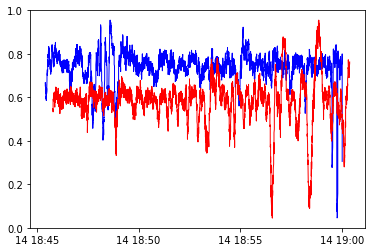

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#corr.plotCurve(ax)
dp1.plotSummedCurve(ax)
dp2.plotSummedCurve(ax)

____
plot for a day and time all observatories (or closest if non available)

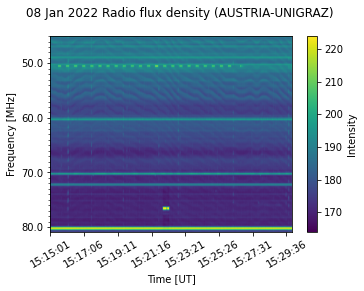

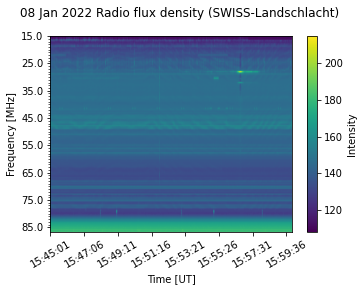

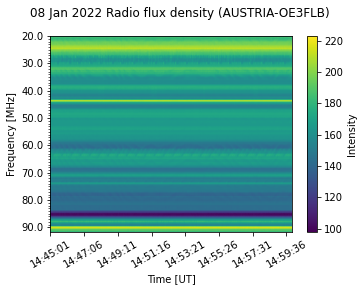

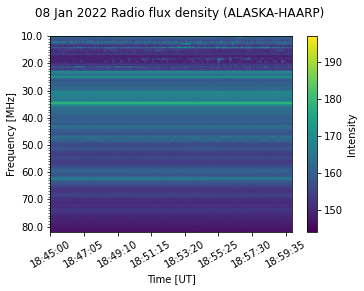

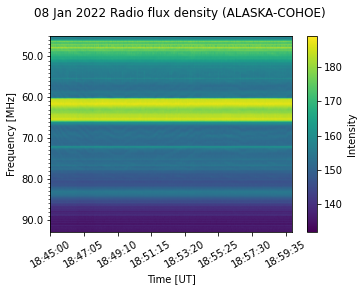

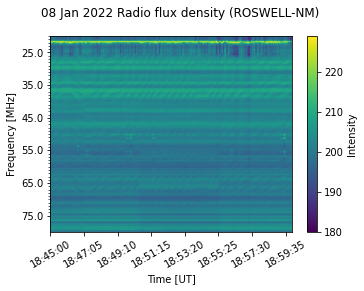

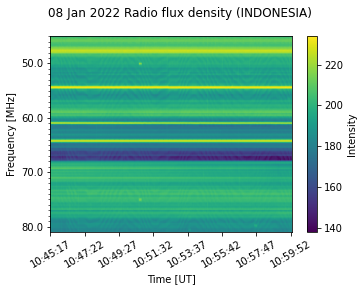

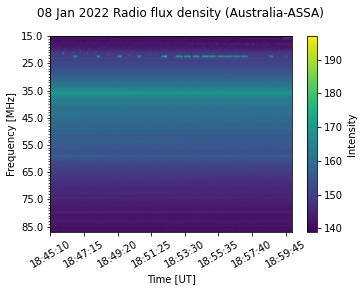

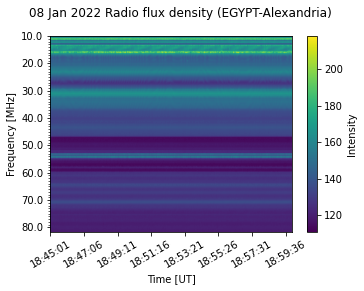

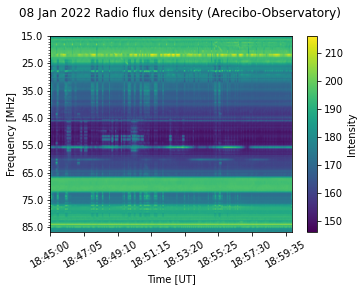

In [76]:
import observatories
import data 
year = 2022
month = 1
day = 8
obs = [observatories.uni_graz, observatories.triest, observatories.swiss_landschlacht, observatories.oe3flb,
                   observatories.alaska_haarp, observatories.alaska_cohoe, observatories.roswell,
                   observatories.indonesia, observatories.assa, observatories.swiss_muhen, observatories.swiss_hb9sct,
                   observatories.egypt_alexandria, observatories.arecibo]
for i in obs:
    try:
        dp = data.createFromTime(year, month, day, "18:46:00", i, [45,81])
        dp.plot()
    except:
        pass

In [77]:
for i in range(17,32):
    print(reference.reference(year, month, i))

[['III/1', 07:38:00, 07:38:00, '1.0000'], ['III/1', 09:05:00, 09:06:00, '1.0000'], ['VI/2', 10:54:00, 11:52:00, '1.0000'], ['III/2', 13:20:00, 13:22:00, '1.0000'], ['III/1', 14:22:00, 14:23:00, '1.0000'], ['III/1', 19:20:00, 19:24:00, '1.0000']]
[['II/1', 17:31:00, 17:42:00, '1.0000'], ['IV/1', 17:41:00, 18:35:00, '1.0000'], ['III/1', 23:03:00, 23:04:00, '1.0000']]
[['III/1', 14:06:00, 14:06:00, '1.0000'], ['III/1', 14:30:00, 14:32:00, '1.0000']]
[['V/3', 05:56:00, 06:04:00, '1.0000'], ['II/2', 05:57:00, 06:13:00, '1.0000'], ['IV/1', 06:17:00, 07:05:00, '1.0000'], ['III/1', 06:24:00, 06:25:00, '1.0000']]
[]
[['III/1', 05:48:00, 05:48:00, '1.0000']]
[]
[]
[['III/1', 07:43:00, 07:43:00, '1.0000']]
[['III/1', 07:33:00, 07:33:00, '1.0000']]
[['III/2', 03:58:00, 03:58:00, '1.0000'], ['III/1', 05:12:00, 05:12:00, '1.0000'], ['III/1', 08:51:00, 08:51:00, '1.0000'], ['III/1', 08:52:00, 08:52:00, '1.0000']]
[]
[['III/1', 08:44:00, 08:44:00, '1.0000'], ['III/2', 08:45:00, 08:46:00, '1.0000'], ['

In [12]:
from astropy.io import fits
import const 

year = 2022
month = 1
day = 1

path = const.pathDataDay(year,month,day)
file = 'ALASKA-COHOE_20220101_234507_01.fit.gz'


aa = fits.open(path + file)
aa.close()
aa[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3600                                                  
NAXIS2  =                  200                                                  
EXTEND  =                    T                                                  
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
DATE    = '2022-01-01'         / Time of observation                            
CONTENT = '2022/01/01  Radio flux density, e-CALLISTO (ALASKA-COHOE)' / Title of
ORIGIN  = 'COHOE   '        

In [2]:
import analysis
from datetime import datetime, timedelta

a = datetime(2022,12,12,12,10,0)
c = datetime(2022,12,12,12,14,0)
d = datetime(2022,12,12,16,14,0)
dd = analysis.Event(c, probability=0.9)

aa = analysis.Event(a, probability=0.1)
a1 = analysis.Event(c, probability=0.5)

cc = analysis.Event(a, probability=0.9)

o = analysis.EventList([aa,a1])
ddl = analysis.EventList(dd)
print(o)
print(ddl)
u = o + cc
print(o)
print(ddl)
print(u)

p = u - aa
print(u)
print(p)

[['???', 12:10:00, 12:10:00, '0.1000'], ['???', 12:14:00, 12:14:00, '0.5000']]
[['???', 12:14:00, 12:14:00, '0.9000']]
[['???', 12:10:00, 12:10:00, '0.1000'], ['???', 12:14:00, 12:14:00, '0.5000']]
[['???', 12:14:00, 12:14:00, '0.9000']]
[['???', 12:10:00, 12:10:00, '0.9000'], ['???', 12:14:00, 12:14:00, '0.5000']]
[['???', 12:10:00, 12:10:00, '0.9000'], ['???', 12:14:00, 12:14:00, '0.5000']]
[['???', 12:14:00, 12:14:00, '0.5000']]


In [3]:
def midday(longitude):
    """
    sun zenith by longitude
    """
    return (12 -((longitude + 360))/ 360 * 24) % 24

def frqProfile(_list: List[data.DataPoint]):
    """
    most frequent freq id of a list of datapoints
    """
    fa = [i.spectrum_data.header["FRQFILE"] for i in _list]
    fsets = set(fa)
    count = [fa.count(i) for i in fsets]
    return list(fsets)[count.index(max(count))]

def cutFreqProfile(day: List[data.DataPoint], frq_profile):
    return [i for i in day if (i.spectrum_data.header["FRQFILE"] == frq_profile)] 

def cutDayBefore(day: List[data.DataPoint], hour_limit: datetime):
    return [i for i in day if (i.hour >= hour_limit.hour)]

def cutDayAfter(day: List[data.DataPoint], hour_limit: datetime):
    return [i for i in day if (i.hour <= hour_limit.hour)]

def listDataPointDay(year, month, day, observatory: observatories.Observatory, spectral_range):
    date = datetime(year=year, month=month, day=day, hour=int(observatory.obsTime()))
    date_ahead = date - timedelta(days=1)
    date_behind = date + timedelta(days=1)
    midnight = date + timedelta(hours=12)

    download.downloadFullDay(date.year, date.month, date.day , [observatory])
    download.downloadFullDay(date_ahead.year, date_ahead.month, date_ahead.day , [observatory])
    download.downloadFullDay(date_behind.year, date_behind.month, date_behind.day , [observatory])

    day_list = data.createDay(date.year, date.month, date.day, observatory, spectral_range)
    date_ahead_list = data.createDay(date_ahead.year, date_ahead.month, date_ahead.day, observatory, spectral_range)
    date_behind_list = data.createDay(date_behind.year, date_behind.month, date_behind.day, observatory, spectral_range)


    date_ahead_relevant = cutDayBefore(date_ahead_list, midnight) 
    date_behind_relevant = cutDayAfter(date_behind_list, midnight) 

    if date_ahead_relevant and date_behind_relevant:
        date_ahead_relevant.extend(cutDayAfter(day_list, midnight))
        day_list = cutDayBefore(day_list, midnight)
        day_list.extend(date_behind_relevant)

        frq_profile_1st = frqProfile(date_ahead_list)
        frq_profile_2nd = frqProfile(day_list)
        date_ahead_relevant = cutFreqProfile(date_ahead_relevant, frq_profile_1st)
        day_list = cutFreqProfile(day_list, frq_profile_2nd)

        date_ahead_relevant = date_ahead_relevant
        return [date_ahead_relevant, day_list]

    frq_profile = frqProfile(day_list)
    day_list = cutFreqProfile(day_list, frq_profile)
    return [day_list]

def referenceFileName(year, month, day, next_folder=False):
    return  "./eCallistoData/reference/{}_events/{}{}{}events.txt".format(str(year+next_folder), str(year), str(month).zfill(2), str(day).zfill(2))

def reference(year, month, day):
    try:
        file = referenceFileName(year, month, day)
        f = open(file)
    except FileNotFoundError:
        file = referenceFileName(year, month, day, next_folder=True)
        f = open(file)
    lines_read = f.readlines()
    lines = []
    f.close()
    lines_read = lines_read[12:]

    for line in lines_read:
        if line == '\n':
            lines_read.remove(line)

    for line in range(len(lines_read)):
        lines.append(lines_read[line].rsplit(' '))
        lines[line] = list(filter(None, lines[line]))
        try:
            lines[line].remove('+')
        except ValueError:
            pass

    lines = list(filter(lambda line: line[6] == 'RSP', lines))

    references = []
    for line in lines:
        start_hour = int(line[1][:2])
        start_minute = int(line[1][2:])
        end_hour = int(line[3][:2])
        end_minute = int(line[3][2:])
        b_type = line[8].rsplit('/')[0]
        event = analysis.Event(datetime(year, month, day, start_hour, start_minute), 
                               end_time=datetime(year, month, day, end_hour, end_minute), burst_type=b_type)
        references.append(event)
    return references

In [27]:
year = 2021
month = 12
day = 31

obs1 = observatories.oe3flb
obs2 = observatories.roswell
obs3 = observatories.alaska_haarp

listDataPointDay(year, month, day, obs2, [45,81])

[[ROSWELL-NM_20211231_133000_58.fit.gz,
  ROSWELL-NM_20211231_134500_58.fit.gz,
  ROSWELL-NM_20211231_140000_58.fit.gz,
  ROSWELL-NM_20211231_141500_58.fit.gz,
  ROSWELL-NM_20211231_143000_58.fit.gz,
  ROSWELL-NM_20211231_144500_58.fit.gz,
  ROSWELL-NM_20211231_150000_58.fit.gz,
  ROSWELL-NM_20211231_151500_58.fit.gz,
  ROSWELL-NM_20211231_153000_58.fit.gz,
  ROSWELL-NM_20211231_154500_58.fit.gz,
  ROSWELL-NM_20211231_160000_58.fit.gz,
  ROSWELL-NM_20211231_161500_58.fit.gz,
  ROSWELL-NM_20211231_163000_58.fit.gz,
  ROSWELL-NM_20211231_164500_58.fit.gz,
  ROSWELL-NM_20211231_170000_58.fit.gz,
  ROSWELL-NM_20211231_171500_58.fit.gz,
  ROSWELL-NM_20211231_173000_58.fit.gz,
  ROSWELL-NM_20211231_174500_58.fit.gz,
  ROSWELL-NM_20211231_180000_58.fit.gz,
  ROSWELL-NM_20211231_181500_58.fit.gz,
  ROSWELL-NM_20211231_183000_58.fit.gz,
  ROSWELL-NM_20211231_184500_58.fit.gz,
  ROSWELL-NM_20211231_190000_58.fit.gz,
  ROSWELL-NM_20211231_191500_58.fit.gz,
  ROSWELL-NM_20211231_193000_58.fit.gz,


In [4]:
year = 2021
month = 12
day = 31

reference(year, month, day)

[['VI', 00:00:00, 00:01:00, '1.0000'],
 ['III', 00:01:00, 00:01:00, '1.0000'],
 ['III', 02:16:00, 02:16:00, '1.0000'],
 ['V', 03:18:00, 03:27:00, '1.0000'],
 ['VI', 04:05:00, 05:05:00, '1.0000'],
 ['III', 06:35:00, 06:36:00, '1.0000'],
 ['III', 07:08:00, 07:09:00, '1.0000'],
 ['III', 10:01:00, 10:06:00, '1.0000'],
 ['III', 12:18:00, 12:21:00, '1.0000'],
 ['III', 12:27:00, 12:32:00, '1.0000'],
 ['III', 12:49:00, 12:49:00, '1.0000'],
 ['III', 14:56:00, 15:00:00, '1.0000'],
 ['III', 18:33:00, 18:34:00, '1.0000']]

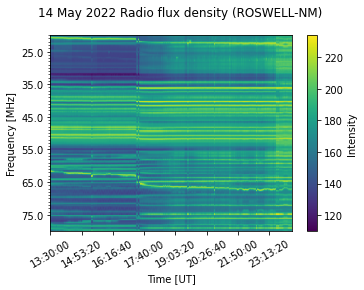

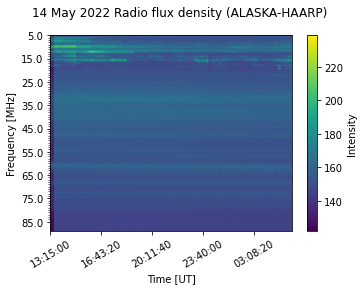

ALASKA-HAARP_20220514_000000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_001500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_003000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_004500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_010000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_011500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_013000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_014500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_020000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_021500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_023000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_024500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_030000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_031500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_033000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_034500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_040000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_041500_62.fit.gz  -  FRQ01

In [31]:
year = 2022
month = 5
day = 14

obs1 = observatories.roswell
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month, day + 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month,day + 1, obs1, [45,81])
d22 = data.createDay(year,month,day + 1, obs2, [45,81])

ref1 = frqProfile(d11)
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = frqProfile(d21)
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

for i in d21:
    print(i," - ", i.spectrum_data.header["FRQFILE"])
for i in d22:
    print(i," - ", i.spectrum_data.header["FRQFILE"])

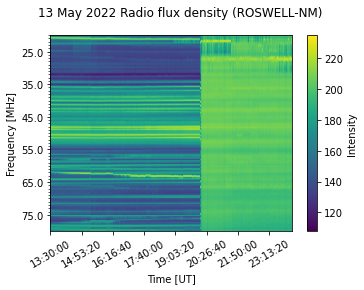

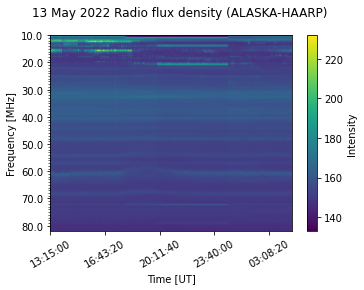

In [80]:
year = 2022
month = 5
day = 13

obs1 = observatories.roswell
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month, day + 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month,day + 1, obs1, [45,81])
d22 = data.createDay(year,month,day + 1, obs2, [45,81])

ref1 = d11[-1].spectrum_data.header["FRQFILE"]
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = d21[-1].spectrum_data.header["FRQFILE"]
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

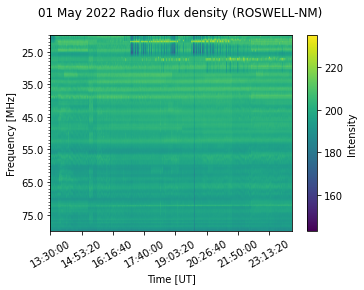

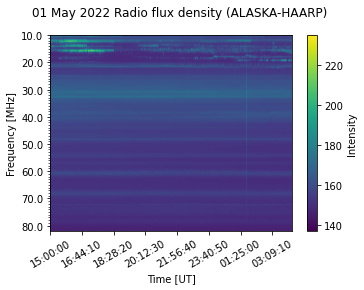

In [68]:
year = 2022
month = 5
day = 1

obs1 = observatories.roswell
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month, day + 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month,day + 1, obs1, [45,81])
d22 = data.createDay(year,month,day + 1, obs2, [45,81])

ref1 = d11[0].spectrum_data.header["FRQFILE"]
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = d21[0].spectrum_data.header["FRQFILE"]
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

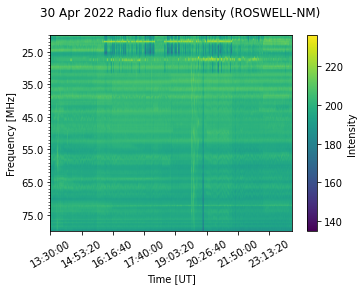

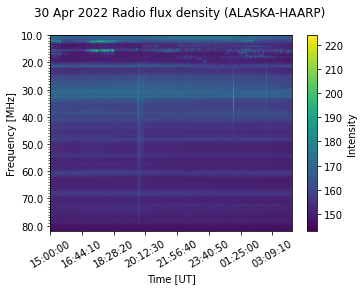

In [70]:
year = 2022
month = 4
day = 30

obs1 = observatories.roswell
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month + 1, 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month + 1, 1, obs1, [45,81])
d22 = data.createDay(year,month + 1, 1, obs2, [45,81])

ref1 = d11[0].spectrum_data.header["FRQFILE"]
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = d21[0].spectrum_data.header["FRQFILE"]
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

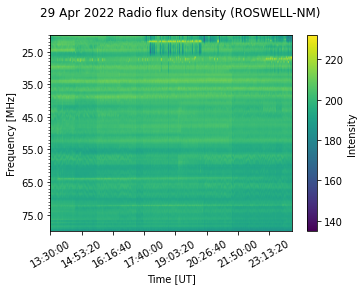

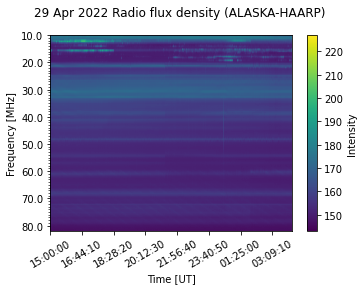

In [72]:
year = 2022
month = 4
day = 29

obs1 = observatories.roswell
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month, day + 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month,day + 1, obs1, [45,81])
d22 = data.createDay(year,month,day + 1, obs2, [45,81])

ref1 = d11[0].spectrum_data.header["FRQFILE"]
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = d21[0].spectrum_data.header["FRQFILE"]
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

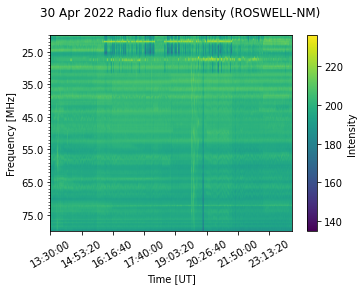

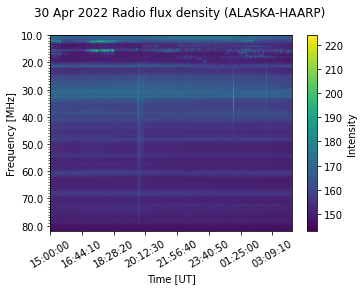

In [4]:
year = 2022
month = 4
day = 30

obs1 = observatories.roswell
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month + 1, 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month + 1, 1, obs1, [45,81])
d22 = data.createDay(year,month + 1, 1, obs2, [45,81])

ref1 = frqProfile(d11)
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = frqProfile(d21)
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

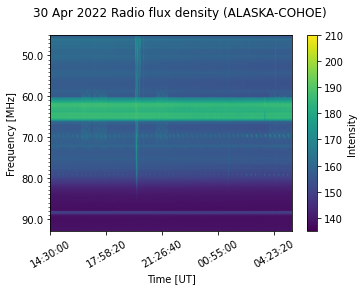

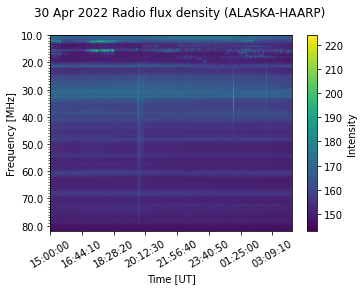

In [5]:
year = 2022
month = 4
day = 30

obs1 = observatories.alaska_cohoe
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month + 1, 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month + 1, 1, obs1, [45,81])
d22 = data.createDay(year,month + 1, 1, obs2, [45,81])

ref1 = frqProfile(d11)
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = frqProfile(d21)
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

In [37]:
class DisClass(datetime):
    def hahaha(self):
        print("hahaha ", self)

a = DisClass(2022,10,5,13,15)
a.hahaha()

hahaha  2022-10-05 13:15:00
